# Práctica 2
#### Análisis sobre datos de árboles en CABA (en espacios verdes)

Dataset usado: [Arbolado en espacios verdes](https://data.buenosaires.gob.ar/dataset/arbolado-espacios-verdes)

-------

### Preparación de datos

In [38]:
import pandas as pd
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def refrescar_arboles():
    return pd.read_csv("Materiales/arbolado-en-espacios-verdes.csv")

arboles = refrescar_arboles()
arboles.dtypes

long          float64
lat           float64
id_arbol        int64
altura_tot      int64
diametro        int64
inclinacio      int64
id_especie      int64
nombre_com     object
nombre_cie     object
tipo_folla     object
espacio_ve     object
ubicacion      object
nombre_fam     object
nombre_gen     object
origen         object
coord_x       float64
coord_y       float64
dtype: object

---------

### Ejercicio 1

Definir una función leer_parque(nombre_archivo, parque) que abra el 
archivo indicado y devuelva una lista de diccionarios con la información de 
parque especificado. La lista debe tener un diccionario por cada árbol del parq e
elegido. Dicho diccionario debe tener los datos correspondientes a un ár ol
(recordar que cada fila del csv corresponde a un árb l).
Probar la función en el parque ‘GENERAL PAZ’ y debería dar una lista co  690
á.rboles

In [3]:
def leer_parque(nombre_archivo, parque):
    trees = pd.read_csv("Materiales/arbolado-en-espacios-verdes.csv")
    trees = trees[trees['espacio_ve'] == parque]
    return trees.to_dict(orient='records')

len(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")) # 690
res_ej1 = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")

print(len(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")))
leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")[:1]

690


[{'long': -58.5050933042,
  'lat': -34.5675817714,
  'id_arbol': 1380,
  'altura_tot': 20,
  'diametro': 33,
  'inclinacio': 5,
  'id_especie': 330,
  'nombre_com': 'Eucalipto',
  'nombre_cie': 'Eucalyptus sp.',
  'tipo_folla': 'Árbol Latifoliado Perenne',
  'espacio_ve': 'GENERAL PAZ',
  'ubicacion': 'LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AIZPURUA',
  'nombre_fam': 'Mirtáceas',
  'nombre_gen': 'Eucalyptus',
  'origen': 'Exótico',
  'coord_x': 96164.756178,
  'coord_y': 106842.465407}]

---------

### Ejercicio 2

Escribir una función especies(lista_arboles) que tome una lista de árboles 
como la generada en el ejercicio anterior y devuelva el conjunto de especies (l 
columna 'nombre_com' del archivo) que figuran en la list.

In [4]:
def especies(lista_arboles):
    '''
        lista_arboles: list(dict()), tal como se devuelve en leer_parque(...)
        return: set de especies contenidas en lista_arboles
    '''
    # Opcion 1
    trees = pd.DataFrame(lista_arboles)['nombre_com'].unique()
    return set(trees)

ej2_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
res_ej2 = especies(ej2_generalpaz)

res_ej2

{'Acacia blanca',
 'Acacia negra',
 'Alcanforero',
 'Arce negundo',
 'Bunya-bunya (Araucaria de Bidwill)',
 'Caqui',
 'Casuarina',
 'Cedrela',
 'Cedro',
 'Cedro de San Juan',
 'Cedro del Atlas (Cedro plateado o Cedro atlántico)',
 'Cedro del Himalaya',
 'Cedro del Himalaya variedad aurea',
 'Ceibo',
 'Chamaecyparis',
 'Ciprés',
 'Ciprés blanco',
 'Ciprés calvo',
 'Ciprés leylandi',
 'Corona de cristo',
 'Criptomeria (Cedro del Japón)',
 'Eucalipto',
 'Falso Guayabo (Guayaba del Brasil)',
 'Fenix',
 'Ficus',
 'Fotinia',
 'Fresno (Fresno común)',
 'Fresno americano',
 'Ginkgo',
 'Jacarandá',
 'Juniperus',
 'Lapacho rosado',
 'Laurel de jardin (Laurel de flor)',
 'Laurus',
 'Libocedro (Calocedro)',
 'Ligustro',
 'Ligustro disciplinado (Ligustro variegado)',
 'Limpiatubos',
 'Liquidambar',
 'Macrocarpa (Ciprés de Monterrey o Ciprés de Lambert)',
 'Magnolia',
 'Morera blanca',
 'Morera de papel (Moral de China)',
 'Morera negra',
 'No Determinable',
 'No Determinado',
 'Nogal europeo (Nogal

---------

### Ejercicio 3


Escribir una función contar_ejemplares(lista_arboles) que, dada una lista como la generada con leer_parque(...), devuelva un diccionario en el que las especies sean las claves y tengan como valores asociados la cantidad de ejemplares en esa especie en la lista dada. Debería verse que en el parque General Paz hay 20 Jacarandás, en el Parque Los Andes hay 3 Tilos y en Parque Centenario hay 1 Laurel.


In [5]:
def contar_ejemplares(lista_arboles):
    trees = pd.DataFrame(lista_arboles)['nombre_com'].value_counts()
    return trees.to_dict()

# ej3_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
ej3_losandes = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "ANDES, LOS")
# ej3_centenario = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "CENTENARIO")

contar_ejemplares(ej3_losandes)

{'Jacarandá': 117,
 'Tipa blanca': 28,
 'Ciprés': 21,
 'Palo borracho rosado': 18,
 'Lapacho': 12,
 'Pindó': 12,
 'Plátano': 12,
 'Ligustro': 7,
 'Fresno americano': 7,
 'Pino': 6,
 'Ginkgo': 6,
 'Cedro': 5,
 'Eucalipto': 5,
 'Gomero': 4,
 'Pata de vaca  (Pezuña de vaca)': 4,
 'Cedro del Himalaya': 4,
 'Arce negundo': 4,
 'Sófora japónica': 4,
 'Aguaribay': 3,
 'Acacia': 3,
 'Tilo': 3,
 'Morera blanca': 3,
 'Árbol del cielo (Ailanto o Árbol de los dioses)': 2,
 'Pino del Paraná (Pino de Misiones o Pino de Brasil)': 2,
 'Acacia frisia': 2,
 'Casuarina': 2,
 'Pino de las canarias': 2,
 'Olmo europeo': 2,
 'Acacia blanca': 2,
 'Libocedro (Calocedro)': 1,
 'Liquidambar': 1,
 'Morus': 1,
 'Encina': 1,
 'Almez (Almecino o Almecina)': 1,
 'Álamo plateado': 1,
 'Laurel': 1,
 'Trachycarpus': 1,
 'Fresno (Fresno común)': 1,
 'Paraíso': 1,
 'Kauri de corteza lisa': 1,
 'Ficus': 1,
 'Corona de cristo': 1,
 'Ciprés calvo': 1}

---------

### Ejercicio 4


Escribir una función obtener_alturas(lista_arboles, especie) que, 
dada una lista como la generada con leer_parque(...) y una especie d 
árbol (un valor de la columna 'nombre_com' del archivo), devuelva una lista c n
las alturas (columna 'altura_tot') de los ejemplares de esa especie en la lista.

In [6]:
def obtener_alturas(lista_arboles, especie):
    trees = pd.DataFrame(lista_arboles)
    res = trees[trees['nombre_com'] == especie]['altura_tot']
    return res

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO']
arbol_a_buscar = 'Jacarandá'
for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    temp_alturas = obtener_alturas(temp_df, arbol_a_buscar)
    print(f'En el parque \'{parque}\' para {arbol_a_buscar} el máximo es {temp_alturas.max()} y el promedio es {temp_alturas.mean():.2f}')

En el parque 'GENERAL PAZ' para Jacarandá el máximo es 16 y el promedio es 10.20
En el parque 'ANDES, LOS' para Jacarandá el máximo es 25 y el promedio es 10.54
En el parque 'CENTENARIO' para Jacarandá el máximo es 18 y el promedio es 8.96


In [7]:
# Resolución al mismo problema mostrando en tabla (parques_a_buscar y arbol_a_buscar se toman de antes)
ej4_res = pd.DataFrame(columns=['Medida'] + parques_a_buscar)
ej4_res.set_index(['Medida'], inplace=True)

max_list = []
prom_list = []

for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    temp_alturas = obtener_alturas(temp_df, arbol_a_buscar)
    max_list = max_list + [temp_alturas.max()]
    prom_list = prom_list + [round(temp_alturas.mean(), 2)]
    # print(f'Para {arbol_a_buscar} el máximo es {temp_alturas.max()} y el promedio es {temp_alturas.mean():.2f}')

ej4_res.loc['max'] = max_list
ej4_res.loc['prom'] = prom_list

ej4_res

,GENERAL PAZ,"ANDES, LOS",CENTENARIO
Medida,,,
max,16.0,25.00,18.00
prom,10.2,10.54,8.96


---------

### Ejercicio 5

Escribir una función obtener_inclinaciones(lista_arboles, especie) que, dada una lista como la generada con leer_parque(...) y una especie de árbol, devuelva una lista con las inclinaciones (columna 'inclinacio') de los ejemplares de esa especie.

In [8]:
def obtener_inclinaciones(lista_arboles, especie):
    trees = pd.DataFrame(lista_arboles)
    return list(trees[trees['nombre_com'] == especie]['inclinacio'].unique())

ej5_generalpaz = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", "GENERAL PAZ")
obtener_inclinaciones(ej5_generalpaz, 'Jacarandá')

[0, 25, 17, 13, 6, 11, 15, 5, 24, 20]

---------

### Ejercicio 6

Combinando la función especies() con obtener_inclinaciones() escribir una función especimen_mas_inclinado(lista_arboles) que, dada una lista de árboles devuelva la especie que tiene el ejemplar más inclinado y su inclinación.

In [9]:
def especimen_mas_inclinado(lista_arboles):
    '''
        lista_arboles: list(dict(...)) que contiene arboles
        return: lista de dos elementos que tienen la inclinación máxima dentro de lista_arboles: [lista de especies que cumplen (en caso de repetidos), inclinación máxima]
    '''
    temp_df = pd.DataFrame(lista_arboles)
    temp_max = temp_df['inclinacio'].max()
    return [temp_df[temp_df['inclinacio'] == temp_max]['nombre_com'].to_list(), temp_max]

# Ejecución

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO']
ej6_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada', 'Inclinación'])
ej6_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque)
    ej6_res.loc[parque] = especimen_mas_inclinado(temp_df) # es una lista con primer elemento lista de especies y segundo elemento max inclinación

ej6_res

,Especie más inclinada,Inclinación
Parque,,
GENERAL PAZ,[Macrocarpa (Ciprés de Monterrey o Ciprés de L...,70
"ANDES, LOS",[Jacarandá],30
CENTENARIO,[Falso Guayabo (Guayaba del Brasil)],80


---------

### Ejercicio 7

Volver a combinar las funciones anteriores para escribir la función especie_promedio_mas_inclinada(lista_arboles) que, dada una lista de árboles devuelva la especie que en promedio tiene la mayor inclinación y el promedio calculado.


In [10]:
def especie_promedio_mas_inclinada(lista_arboles):
    '''
        Descripción: una función que manualmente calcula, para cada especie, el promedio de inclinación y devuelve la especie con el valor máximo promedio
        lista_arboles: list(dict(...)) de arboles (ya prefiltrado por parque)
        return: lista de dos elementos que tienen la inclinación promedio máxima dentro de lista_arboles: [lista de especies que cumplen (en caso de repetidos), inclinación promedio máxima]
    '''
    temp_df = pd.DataFrame(lista_arboles)
    temp_especies = list(especies(lista_arboles))
    
    especie_max_avg_value = temp_df[temp_df['nombre_com'] == temp_especies[0]]['inclinacio'].mean()
    especie_max_names = [temp_especies[0]]

    for i in range(1, len(temp_especies)):
        temp_especie = temp_especies[i]
        temp_max = temp_df[temp_df['nombre_com'] == temp_especie]['inclinacio'].mean()
        if temp_max > especie_max_avg_value:
            especie_max_avg_value = temp_max
            especie_max_names = [temp_especie]
        elif temp_max == especie_max_avg_value:
            especie_max_names.append(temp_especie)

    return [especie_max_names, especie_max_avg_value.round(2)]

# Ejecución

parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO', 'LAGO REGATAS', 'SICILIA']
ej7_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada (en promedio)', 'Inclinación promedio'])
ej7_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = pd.DataFrame(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque))
    ej7_res.loc[parque] = especie_promedio_mas_inclinada(temp_df) # es una lista con primer elemento lista de especies y segundo elemento max inclinación promedio

ej7_res

,Especie más inclinada (en promedio),Inclinación promedio
Parque,,
GENERAL PAZ,[No Determinable],25.00
"ANDES, LOS",[Álamo plateado],25.00
CENTENARIO,[Rosa de Siria],25.00
LAGO REGATAS,[Paraíso],17.86
SICILIA,[Espinillo (Aromo)],60.00


##### Resolución alternativa usando GROUP BY

In [11]:
parques_a_buscar = ['GENERAL PAZ', 'ANDES, LOS', 'CENTENARIO', 'LAGO REGATAS', 'SICILIA']
ej7_alt_res = pd.DataFrame(columns=['Parque', 'Especie más inclinada (en promedio)', 'Inclinación promedio'])
ej7_alt_res.set_index(['Parque'], inplace=True)

for parque in parques_a_buscar:
    temp_df = pd.DataFrame(leer_parque("Materiales/arbolado-en-espacios-verdes.csv", parque))
    temp_res = temp_df.groupby(by=['nombre_com'])['inclinacio'].mean().sort_values(ascending=False).head(1)
    ej7_alt_res.loc[parque] = [temp_res.index.to_list(), temp_res.iloc[0].round(2)]

ej7_alt_res

,Especie más inclinada (en promedio),Inclinación promedio
Parque,,
GENERAL PAZ,[No Determinable],25.00
"ANDES, LOS",[Álamo plateado],25.00
CENTENARIO,[Rosa de Siria],25.00
LAGO REGATAS,[Paraíso],17.86
SICILIA,[Espinillo (Aromo)],60.00


#### Análisis sobre datos de árboles en CABA

Dataset usado: [Arbolado en veredas](https://data.buenosaires.gob.ar/dataset/arbolado-publico-lineal)

-------

In [12]:
### Preparación de datos

data_arboles_veredas = pd.read_csv('Materiales/arbolado-en-veredas.csv')
data_arboles_veredas = data_arboles_veredas[['nombre_cientifico', 'ancho_acera', 'diametro_altura_pecho', 'altura_arbol']]
# data_arboles_veredas.info()

especies_seleccionadas = ['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu']

# Copiamos los datasets para empezar a trabajarlos
df_tipas_parques = arboles[['nombre_cie', 'diametro', 'altura_tot']].copy()
df_tipas_parques.columns = ['nombre_cientifico', 'diametro_altura_pecho', 'altura_arbol'] # lo saqué de hacer df_tipas_veredas.columns

df_tipas_veredas = data_arboles_veredas.copy()

C:\Users\Matias\AppData\Local\Temp\ipykernel_16712\1522486272.py:3: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_arboles_veredas = pd.read_csv('Materiales/arbolado-en-veredas.csv')


In [13]:
# Visualización de datos

In [14]:
# Datos de PARQUES
df_tipas_parques.describe()

,diametro_altura_pecho,altura_arbol
count,51502.000000,51502.000000
mean,39.395616,12.167100
std,31.171205,7.640309
min,1.000000,0.000000
25%,18.000000,6.000000
50%,32.000000,11.000000
75%,54.000000,18.000000
max,500.000000,54.000000


In [15]:
# Datos de VEREDAS
df_tipas_veredas.describe()

,diametro_altura_pecho,altura_arbol
count,369894.000000,365858.000000
mean,31.986864,9.036132
std,21.267623,4.894625
min,0.000000,1.000000
25%,17.000000,6.000000
50%,29.000000,8.000000
75%,43.000000,12.000000
max,199.000000,40.000000


#### Comparamos los nombres cientificos en ambos datasets y unificamos

En este caso, vemos que los nombres ['Tilia x moltkei', 'Jacarandá mimosifolia', 'Tipuana tipu'] se ven en el primer dataset como ['Tilia viridis subsp. x moltkei', 'Jacarandá mimosifolia', 'Tipuana Tipu']

Vamos a elegir los nombres de dataset de veredas y asignárselos al de parques, por ser más básico.

-------

In [16]:
df_tipas_parques[df_tipas_parques['nombre_cientifico'].str.contains('oltkei')]['nombre_cientifico'].unique()

# Cambiamos los valores
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('oltkei'), 'nombre_cientifico'] = 'Tilia x moltkei'
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('acarand'), 'nombre_cientifico'] = 'Jacaranda mimosifolia'
df_tipas_parques.loc[df_tipas_parques['nombre_cientifico'].str.contains('ipuan'), 'nombre_cientifico'] = 'Tipuana tipu'

In [17]:
# Chequeamos que ambos datasets están con valores unificados de especies_seleccionadas
res = True

for esp in especies_seleccionadas:
    res = res and (df_tipas_parques['nombre_cientifico'] == esp).any() and (df_tipas_veredas['nombre_cientifico'] == esp).any()

res

True

In [18]:
# Ejercicio 9

In [19]:
# df_tipas_parques['ambiente'] = pd.Series(['parques']*df_tipas_parques.shape[0])
df_tipas_parques['ambiente'] = 'parque'
df_tipas_veredas['ambiente'] = 'vereda'

In [20]:
# Ejercicio 10

In [21]:
df_tipas_global = pd.concat([df_tipas_parques, df_tipas_veredas])

In [22]:
df_tipas_global

,nombre_cientifico,diametro_altura_pecho,altura_arbol,ambiente,ancho_acera
0,Washingtonia filifera,35.0,6.0,parque,NaN
1,Washingtonia filifera,35.0,6.0,parque,NaN
2,Washingtonia filifera,35.0,6.0,parque,NaN
3,Phytolacca dioica,50.0,17.0,parque,NaN
4,Phytolacca dioica,50.0,17.0,parque,NaN
...,...,...,...,...,...
370175,Ceiba speciosa,34.0,7.0,vereda,3.3
370176,Melia azedarach,45.0,8.0,vereda,3.3
370177,Ceiba speciosa,60.0,8.0,vereda,3.3
370178,Ceiba speciosa,64.0,8.0,vereda,3.3


## Ejercicio 11 - Experimentación y análisis

--------

#### Posibles preguntas:
- Hay alguna diferencia de altura entre árboles de parques y de veredas?
- Hay alguna diferencia de diámetro entre árboles de parques y de veredas?
- Hay alguna relación entre altura y diámetro que sea constante entre ambos datasets? (comparar coeficientes: dos números)


In [23]:
df_tipas_global.describe()

,diametro_altura_pecho,altura_arbol
count,421396.000000,417360.000000
mean,32.892344,9.422491
std,22.840091,5.409683
min,0.000000,0.000000
25%,17.000000,6.000000
50%,29.000000,9.000000
75%,45.000000,12.000000
max,500.000000,54.000000


In [24]:
especies_seleccionadas

['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu']

Para realizar gráficos y análisis, podríamos empezar con la especie que tenga mayor cantidad de entradas (para que del análisis se puedan concluir mejor los resultados).

In [25]:
for esp in especies_seleccionadas:
    filtro = df_tipas_global['nombre_cientifico'] == esp
    print(f'La especie \'{esp}\' tiene \'{df_tipas_global[filtro & (df_tipas_global['ambiente'] == 'parque')].shape[0]}\' entradas en parques y \'{df_tipas_global[filtro & (df_tipas_global['ambiente'] == 'vereda')].shape[0]}\' en veredas.')

La especie 'Tilia x moltkei' tiene '678' entradas en parques y '15605' en veredas.
La especie 'Jacaranda mimosifolia' tiene '3255' entradas en parques y '13872' en veredas.
La especie 'Tipuana tipu' tiene '4031' entradas en parques y '9330' en veredas.


Tomamos la especie *Tipuana tipu* para experimentar por tener gran cantidad de entradas y diferencia no tan grande entre ambos datasets.

## ¿Hay diferencia de alturas entre árboles de parques y veredas?



Text(0.5, 1.0, 'Altura de Tipuana tipu en parques y veredas (en metros)')

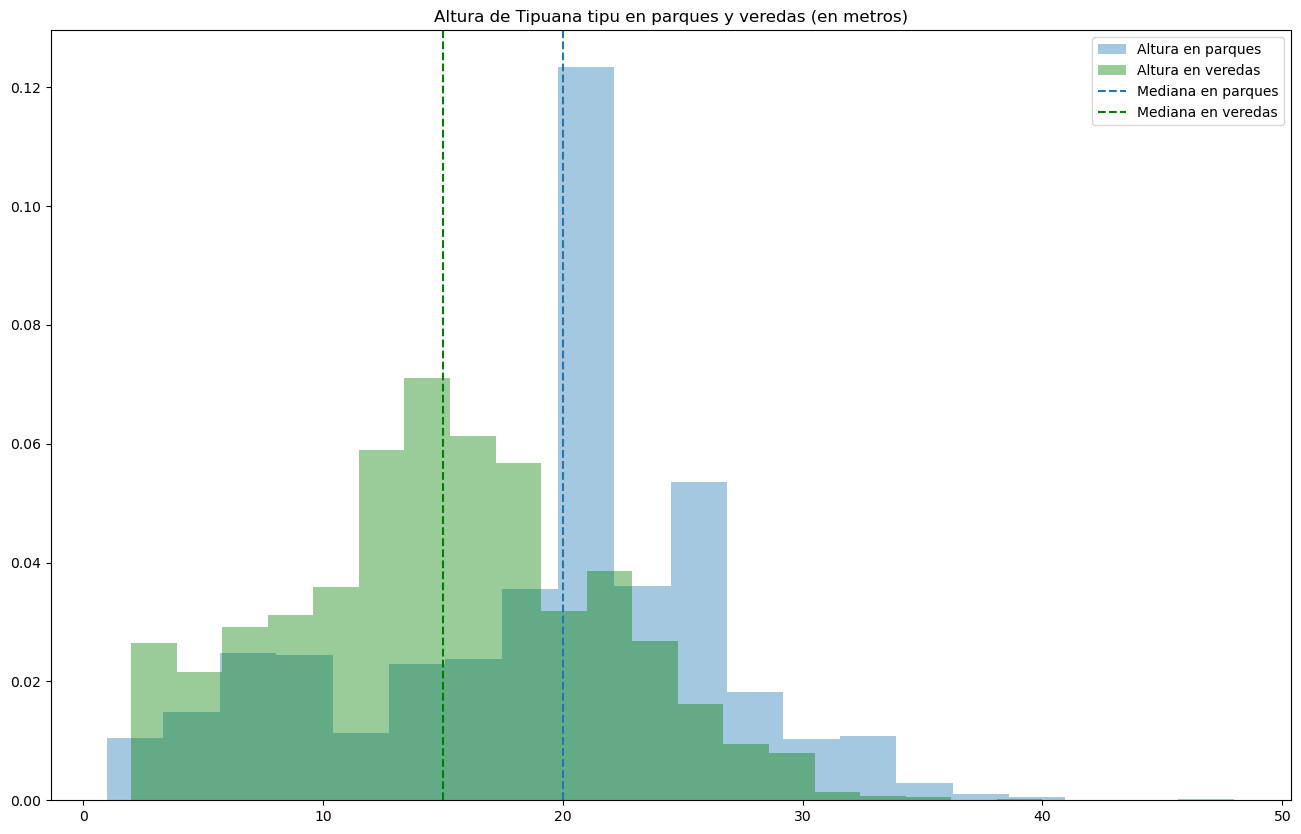

In [26]:
alturas_parque = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']
# alturas_parque = alturas_parque.sample(n=4000, random_state=1)
alturas_vereda = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']
# alturas_vereda = alturas_vereda.sample(n=4000, random_state=1)
# Podemos directamente tomar los datasets enteros, porque hacer un sample para que tengan el mismo tamaño arroja el mismo gráfico (n=4000)

plt.figure(figsize=(16, 10)) # figsize toma ancho y alto en pulgadas
# Dividimos al eje x (altura) en 20 canastos (bins=20). Más que eso quedan espacios y menos que eso perdemos información.
plt.hist(alturas_parque, bins=20, alpha=0.4, density=True, label='Altura en parques')
plt.hist(alturas_vereda, bins=20, alpha=0.4,  density=True, facecolor='green', label='Altura en veredas')
plt.axvline(alturas_parque.median(), 0, 1, label='Mediana en parques', linestyle='dashed')
plt.axvline(alturas_vereda.median(), 0, 1, label='Mediana en veredas', linestyle='dashed', color='green')

plt.legend() # labels de series
plt.title('Altura de Tipuana tipu en parques y veredas (en metros)') # titulo general

### Observaciones:
- Ambas distribuciones parecerían tener forma similar (de Normal) en donde las medianas coinciden con las modas y con los promedios... en general parecería una estar corrida a la derecha respecto de la otra.
- La altura que más se da en árboles de veredas es 15 metros contra 20 metros en parques. Esto podría ser porque los árboles en parques reciben más nutrientes (¿y Sol? por estar en espacios abiertos sin edificios cerca) y crecen más y mejor que en veredas. También podría ser que los árboles de parques tienen en general más tiempo de vida que los de vereda y a éstos últimos les falta tiempo para crecer... aunque no lo creo.
- Pareciera que en parques, hay una *cola* más pronunciada hacia la izquierda, es decir, árboles con menos altura que en veredas. Esto podría ser porque se plantaron estas especies en parques mucho más recientemente que en veredas (les falta crecer, son jóvenes) y viceversa: podría ser que hace un tiempo considerable que no se plantan en veredas.
- Que un arbol de parque crezca hasta tener la altura promedio tiene la mayor probabilidad, 12%. Esto tiene la mitad de chances en veredas, es decir, se tiene más entropía porque la campana es más chata, hay más uniformidad en las alturas.

Text(0.5, 1.0, 'Altura de Jacaranda mimosifolia en parques y veredas (en metros)')

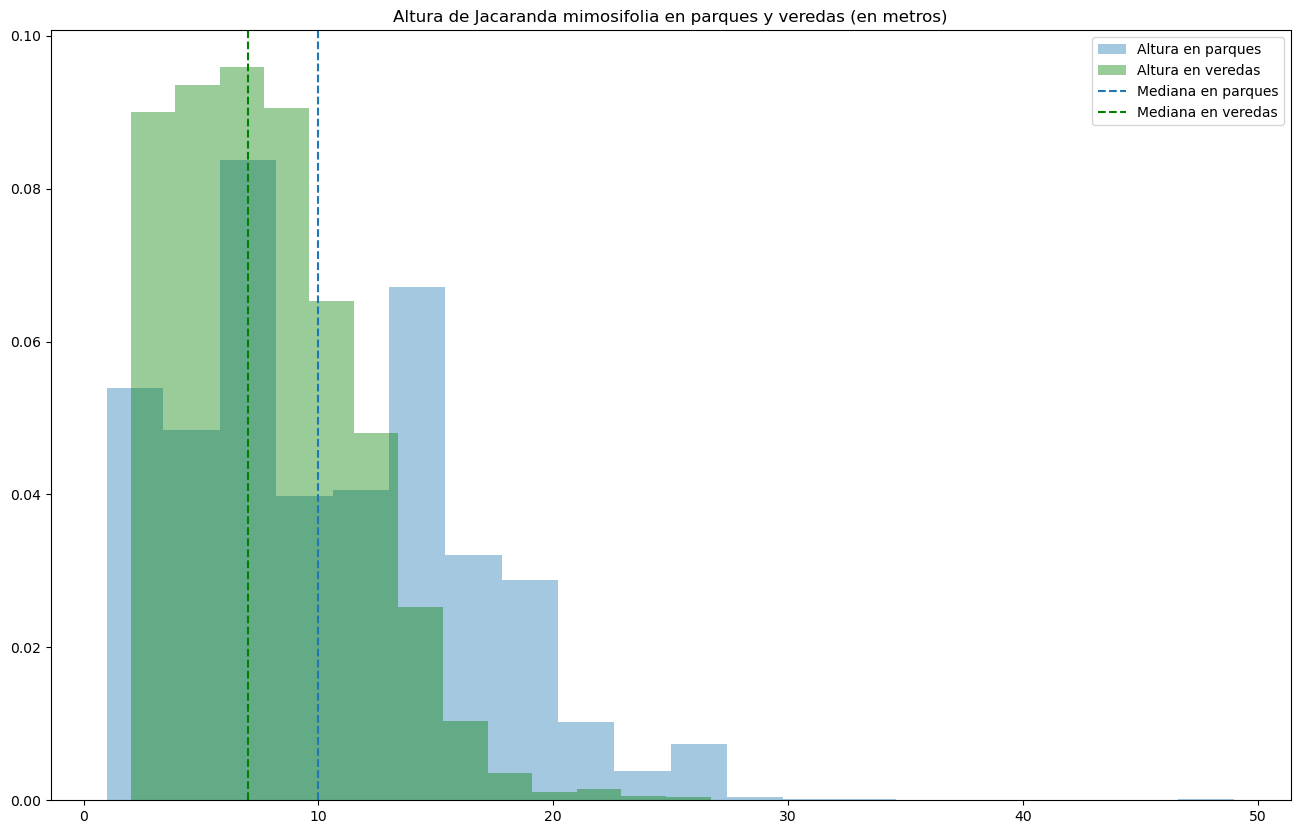

In [27]:
alturas_parque = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Jacaranda mimosifolia')]['altura_arbol']
# alturas_parque = alturas_parque.sample(n=4000, random_state=1)
alturas_vereda = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Jacaranda mimosifolia')]['altura_arbol']
# alturas_vereda = alturas_vereda.sample(n=4000, random_state=1)
# Podemos directamente tomar los datasets enteros, porque hacer un sample para que tengan el mismo tamaño arroja el mismo gráfico (n=4000)

plt.figure(figsize=(16, 10)) # figsize toma ancho y alto en pulgadas
# Dividimos al eje x (altura) en 20 canastos (bins=20). Más que eso quedan espacios y menos que eso perdemos información.
plt.hist(alturas_parque, bins=20, alpha=0.4, density=True, label='Altura en parques')
plt.hist(alturas_vereda, bins=20, alpha=0.4,  density=True, facecolor='green', label='Altura en veredas')
plt.axvline(alturas_parque.median(), 0, 1, label='Mediana en parques', linestyle='dashed')
plt.axvline(alturas_vereda.median(), 0, 1, label='Mediana en veredas', linestyle='dashed', color='green')

plt.legend() # labels de series
plt.title('Altura de Jacaranda mimosifolia en parques y veredas (en metros)') # titulo general

### Observaciones:
- Nuevamente se ve la tendencia de 'en parques los árboles crecen más' como con la especie anterior.
- Los Jacarandá en veredas parecerían ser buenos porque no alcanzan alturas desproporcionadas (prácticamente el 90% está por debajo de 12 metros de altura).

Text(0.5, 1.0, 'Altura de Tilia x moltkei en parques y veredas (en metros)')

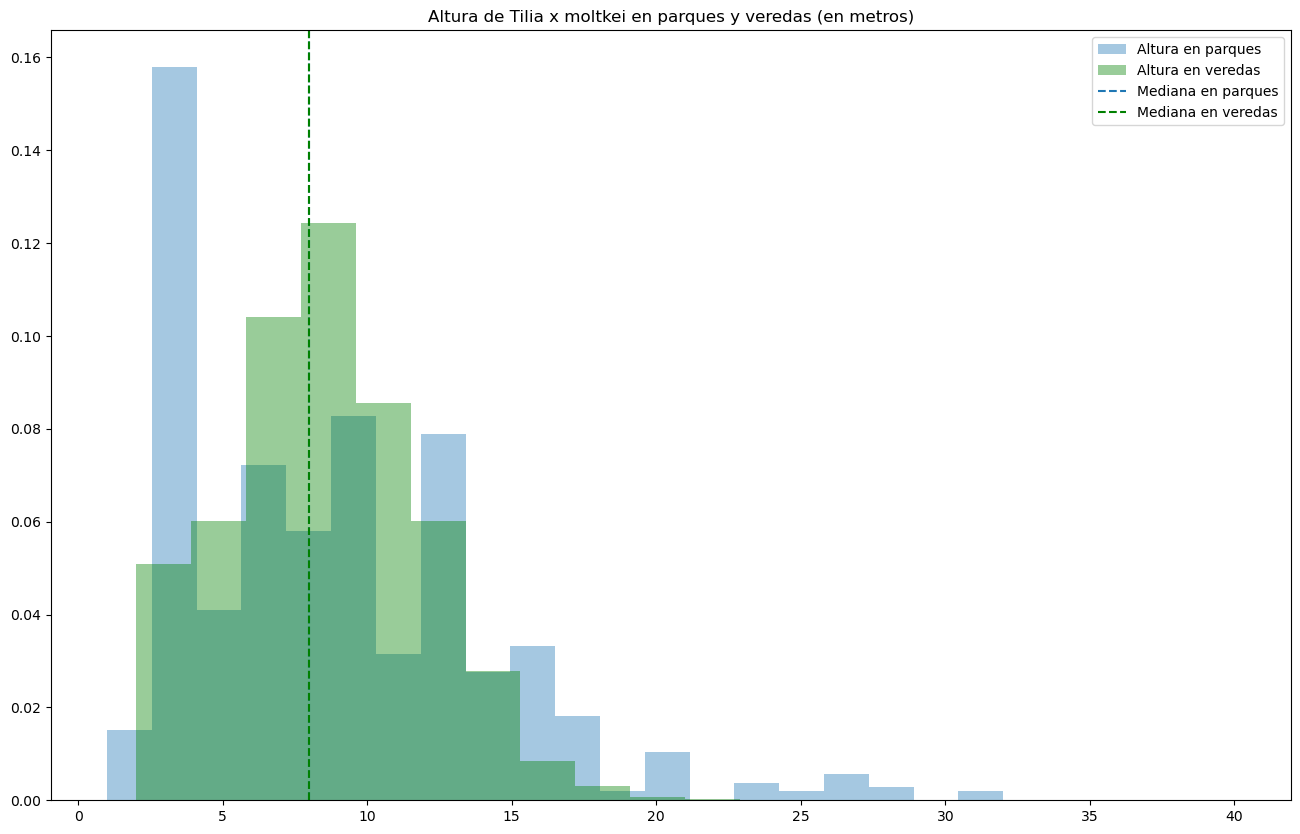

In [28]:
alturas_parque = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Tilia x moltkei')]['altura_arbol']
# alturas_parque = alturas_parque.sample(n=4000, random_state=1)
alturas_vereda = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Tilia x moltkei')]['altura_arbol']
# alturas_vereda = alturas_vereda.sample(n=4000, random_state=1)
# Podemos directamente tomar los datasets enteros, porque hacer un sample para que tengan el mismo tamaño arroja el mismo gráfico (n=4000)

plt.figure(figsize=(16, 10)) # figsize toma ancho y alto en pulgadas
# Dividimos al eje x (altura) en 20 canastos (bins=20). Más que eso quedan espacios y menos que eso perdemos información.
plt.hist(alturas_parque, bins=20, alpha=0.4, density=True, label='Altura en parques')
plt.hist(alturas_vereda, bins=20, alpha=0.4,  density=True, facecolor='green', label='Altura en veredas')
plt.axvline(alturas_parque.median(), 0, 1, label='Mediana en parques', linestyle='dashed')
plt.axvline(alturas_vereda.median(), 0, 1, label='Mediana en veredas', linestyle='dashed', color='green')

plt.legend() # labels de series
plt.title('Altura de Tilia x moltkei en parques y veredas (en metros)') # titulo general

### Observaciones:
- El grueso de las muestras comparte el mismo rango de valores: casi todos los Tilia tanto de parque como de vereda caen en el rango de 2 a 16 metros y tienen la misma mediana.
- Sorprendentemente el 16% de las tipas que crece en parques miden alrededor de 3 metros. Esto podría indicar que son jóvenes y los plantaron hace relativamente poco o los podan/tratan regularmente.
- Hay muchos outliers en parques, a partir de los 20 metros. Sería interesante ver la edad de esos ejemplares para ver si existe una relación (quizás son los más viejos de CABA, por ejemplo).

## ¿Hay diferencia de diámetros entre árboles de parques y veredas?


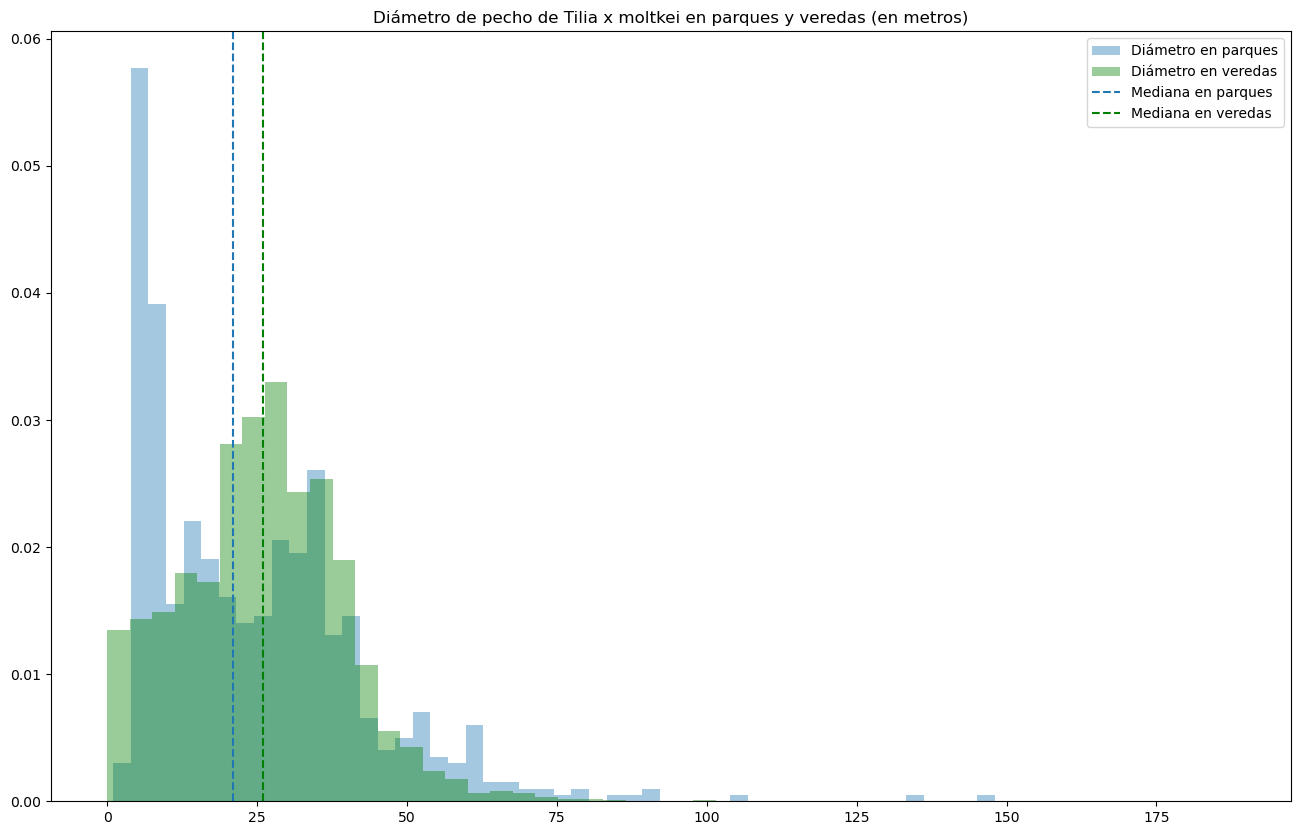

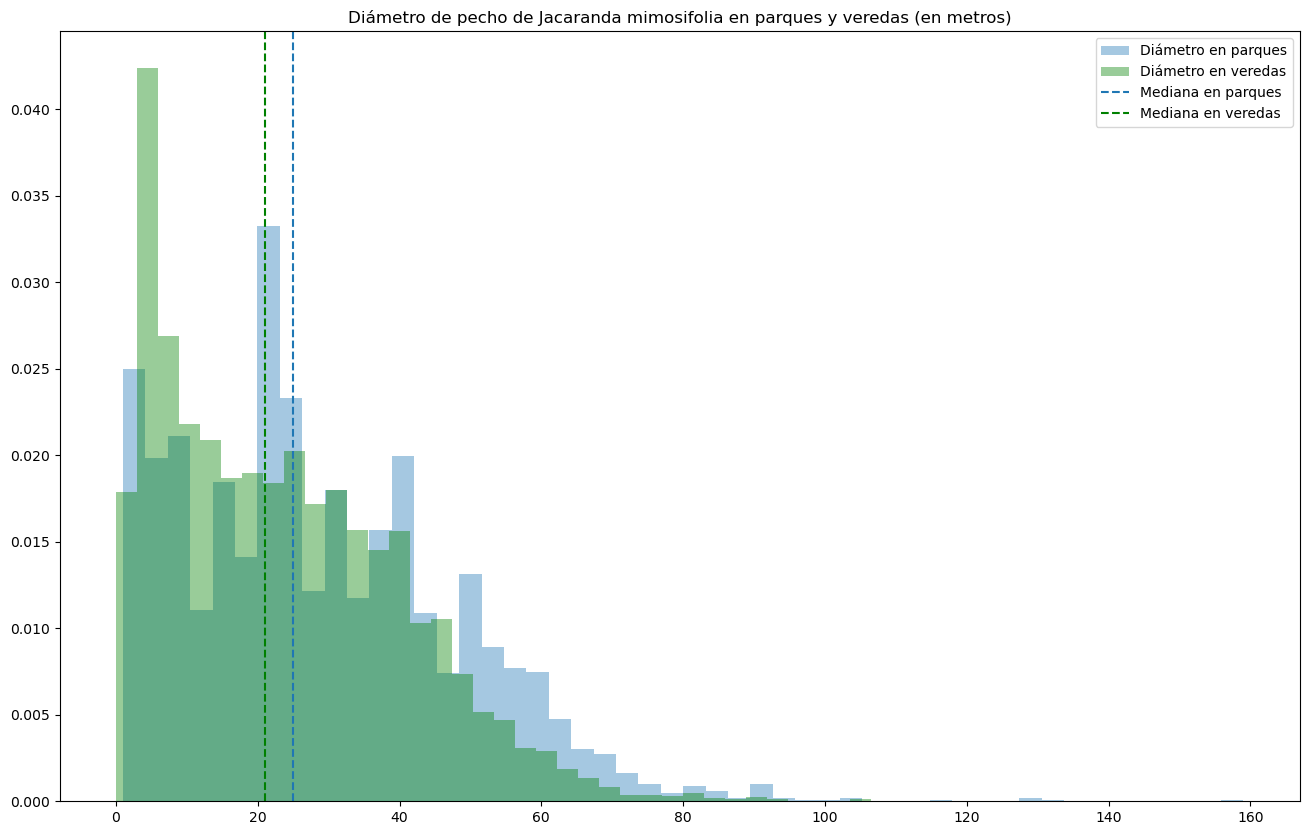

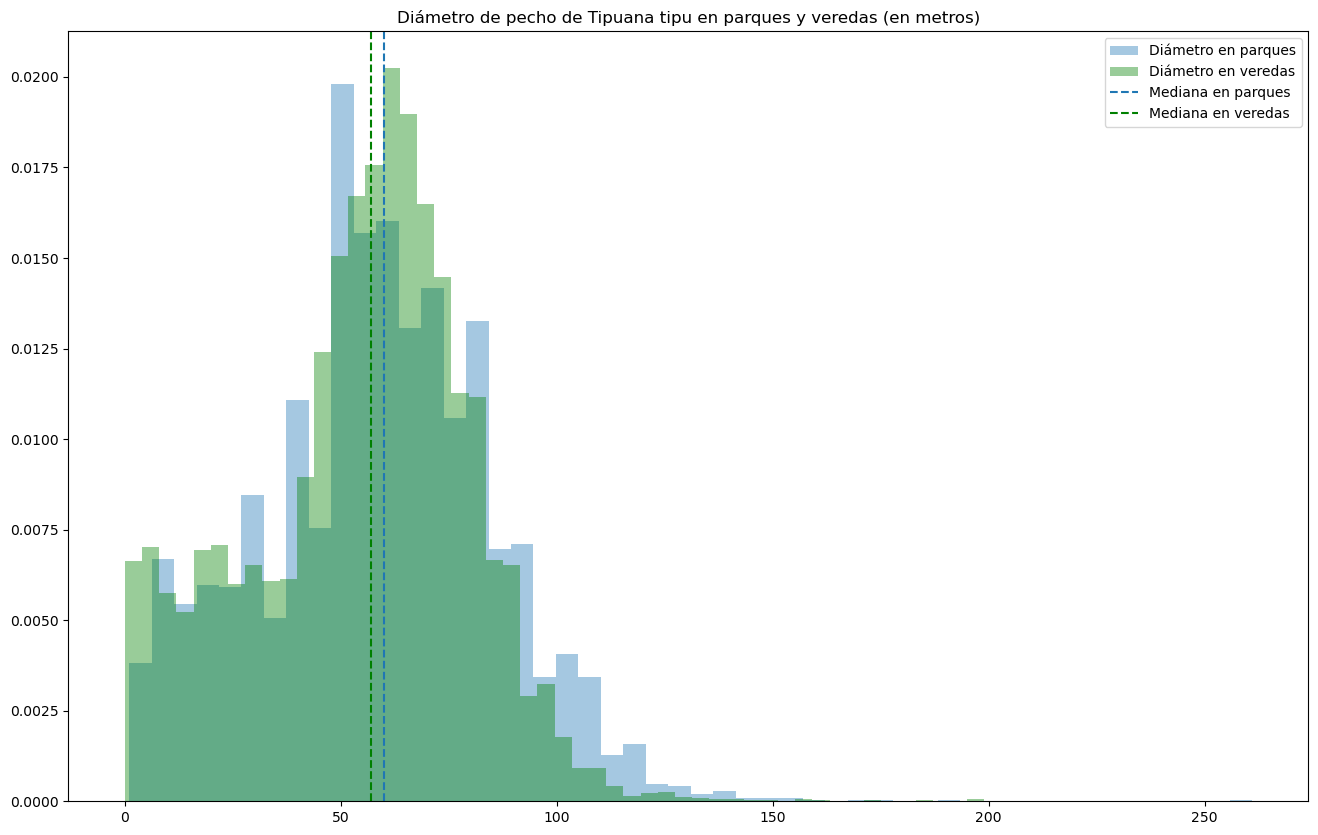

In [29]:
for esp in especies_seleccionadas:
    alturas_parque = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == esp)]['diametro_altura_pecho']
    alturas_vereda = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == esp)]['diametro_altura_pecho']
    
    plt.figure(figsize=(16, 10)) # figsize toma ancho y alto en pulgadas
    plt.hist(alturas_parque, bins=50, alpha=0.4, density=True, label='Diámetro en parques')
    plt.hist(alturas_vereda, bins=50, alpha=0.4,  density=True, facecolor='green', label='Diámetro en veredas')
    plt.axvline(alturas_parque.median(), 0, 1, label='Mediana en parques', linestyle='dashed')
    plt.axvline(alturas_vereda.median(), 0, 1, label='Mediana en veredas', linestyle='dashed', color='green')
    
    plt.legend() # labels de series
    plt.title(f'Diámetro de pecho de {esp} en parques y veredas (en metros)') # titulo general

### Observaciones:
- No se distinguen diferencias, parecería que la ubicación del árbol no afecta de forma directa el diámetro del pecho.

<Axes: xlabel='altura_arbol', ylabel='diametro_altura_pecho'>

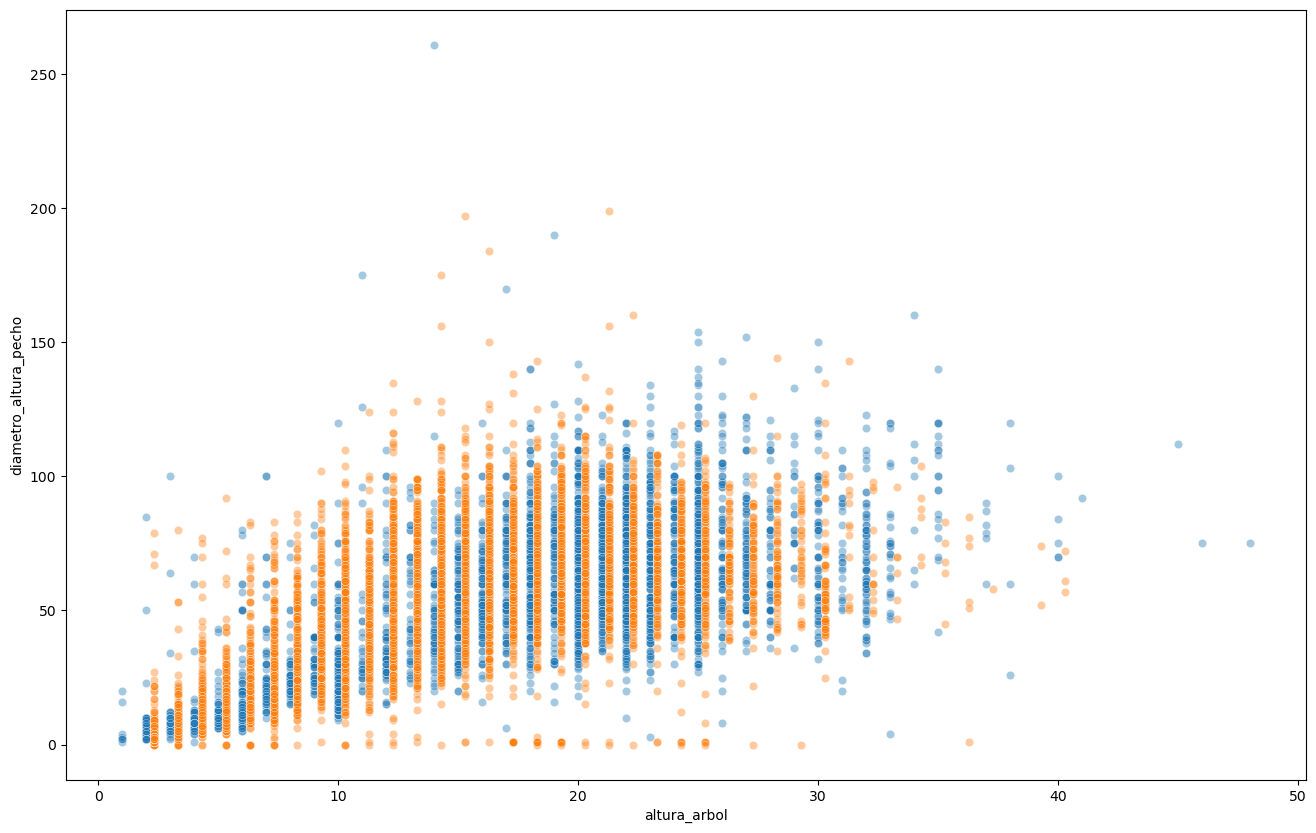

In [30]:
eje_x = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']
eje_y = df_tipas_global[(df_tipas_global['ambiente'] == 'parque') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['diametro_altura_pecho']
eje_x_2 = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['altura_arbol']
eje_y_2 = df_tipas_global[(df_tipas_global['ambiente'] == 'vereda') & (df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')]['diametro_altura_pecho']

plt.figure(figsize=(16, 10))
sns.scatterplot(x=eje_x, y=eje_y, alpha=0.4)
sns.scatterplot(x=(eje_x_2+0.3), y=eje_y_2, alpha=0.4)

<Axes: xlabel='altura_arbol', ylabel='diametro_altura_pecho'>

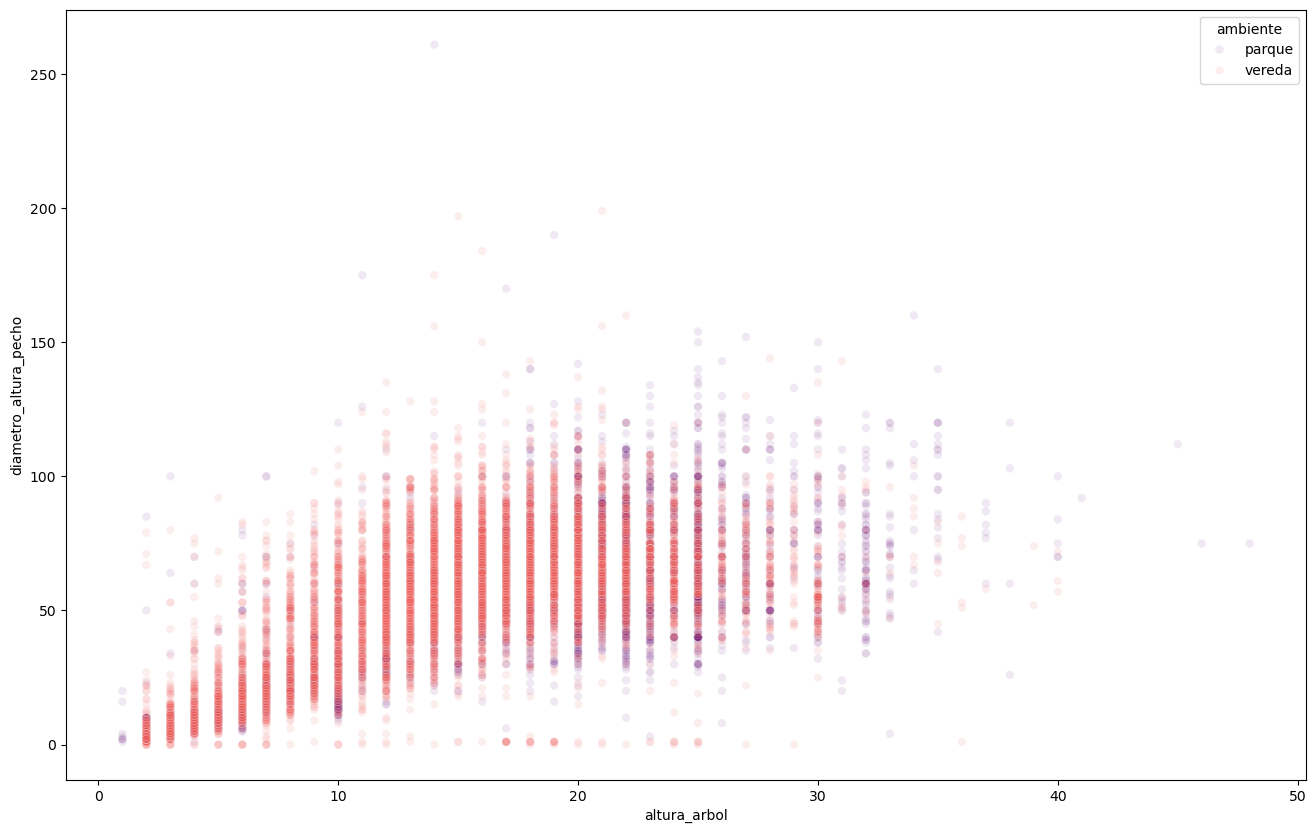

In [31]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='altura_arbol', y='diametro_altura_pecho', alpha=0.1, 
                data=df_tipas_global[(df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')].reset_index(), hue='ambiente',
               palette='magma')

<Figure size 1600x1000 with 0 Axes>

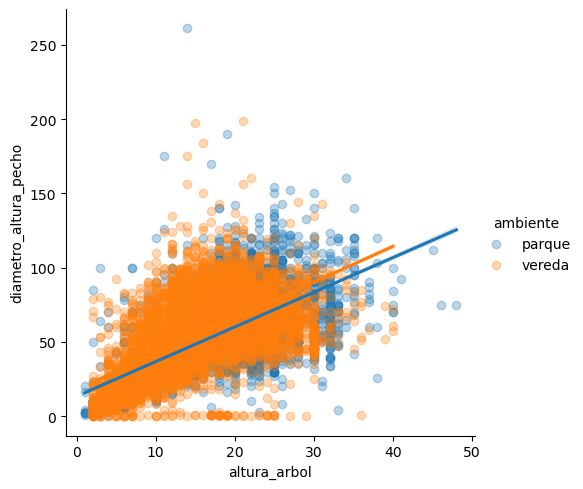

In [32]:
plt.figure(figsize=(16, 10))
sns.lmplot(x='altura_arbol', y='diametro_altura_pecho', scatter_kws={'alpha':0.3},
                data=df_tipas_global[(df_tipas_global['nombre_cientifico'] == 'Tipuana tipu')].reset_index(), hue='ambiente')

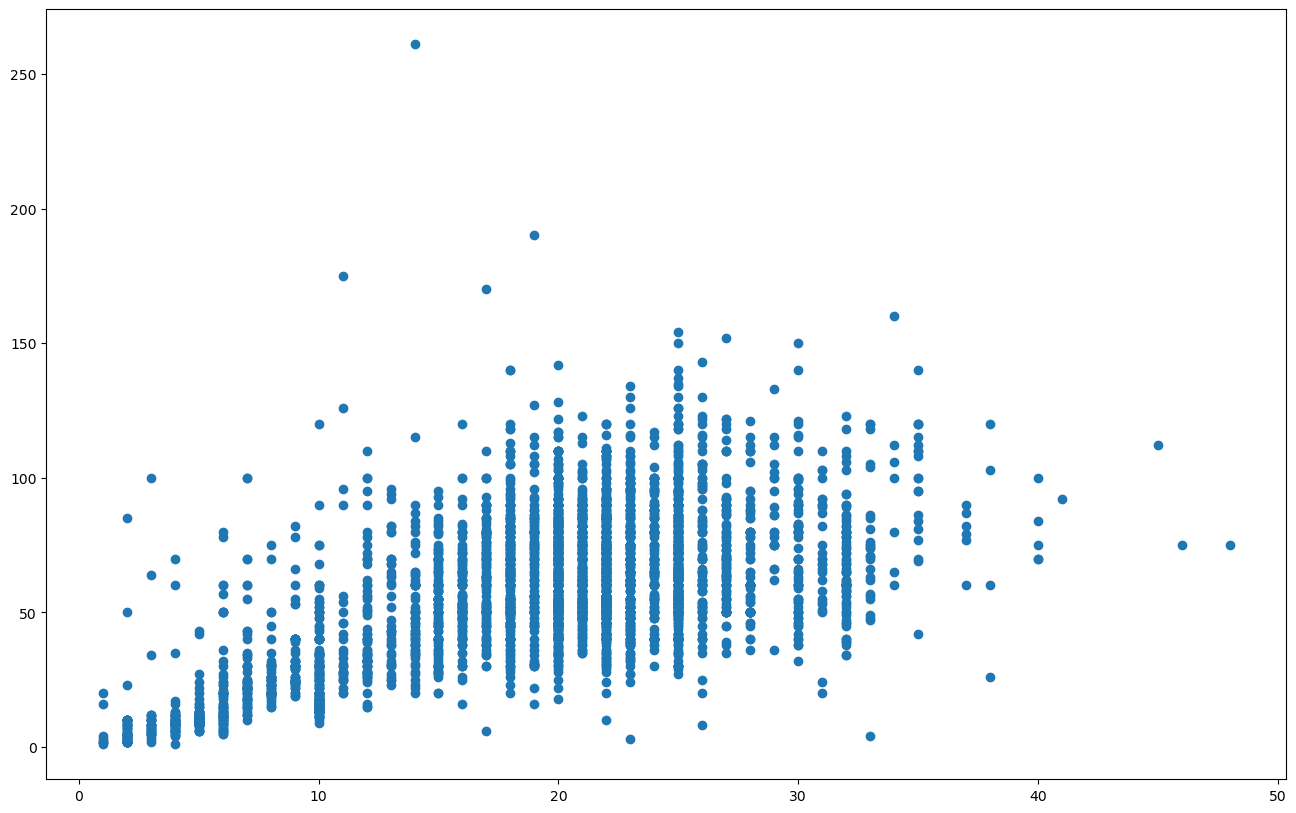

In [33]:
plt.figure(figsize=(16, 10))
plt.scatter(x=eje_x, y=eje_y)

In [101]:
eje_x.unique()

array([25., 22., 20., 31., 28., 16., 23.,  4., 34., 19., 18., 17., 27.,
       12.,  7.,  1., 13., 26., 21., 15., 14., 24., 33.,  3., 30., 35.,
       32., 37.,  8.,  6., 11., 40., 48., 29., 10.,  2.,  5.,  9., 41.,
       38., 46., 45.])

In [111]:
xedges

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

"\nax = fig.add_subplot(132, title='pcolormesh: actual edges',\n        aspect='equal')\nX, Y = np.meshgrid(xedges, yedges)\nax.pcolormesh(X, Y, H)\n#<matplotlib.collections.QuadMesh object at 0x...>\n\n\nax = fig.add_subplot(133, title='NonUniformImage: interpolated',\n        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])\nim = NonUniformImage(ax, interpolation='bilinear')\nxcenters = (xedges[:-1] + xedges[1:]) / 2\nycenters = (yedges[:-1] + yedges[1:]) / 2\nim.set_data(xcenters, ycenters, H)\n# ax.add_image(im)\n# plt.show()\n"

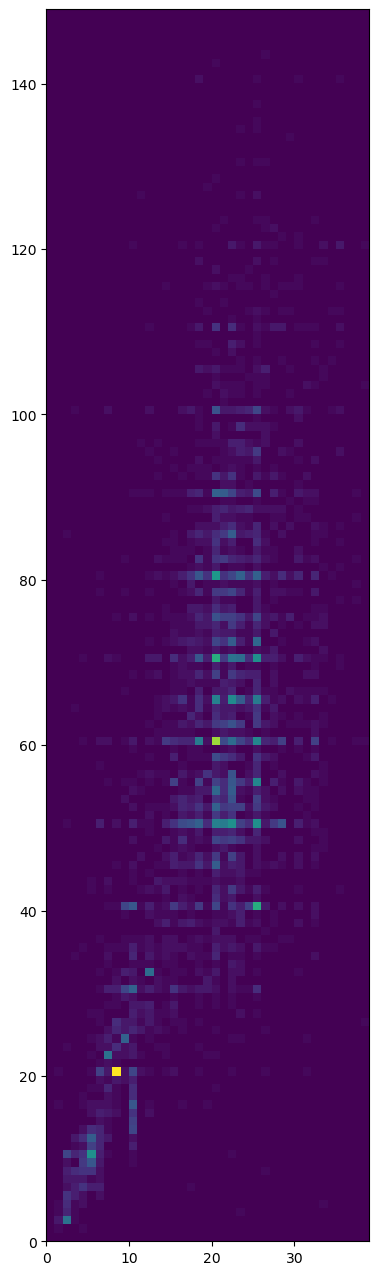

In [119]:
H, xedges, yedges = np.histogram2d(eje_x, eje_y, bins=(list(range(0, 40)), list(range(0, 150))))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H = H.T


fig = plt.figure(figsize=(16, 16))
#ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        #extent=[xedges[0], xedges[-1], yedges[0],60])# yedges[-1]])
# #<matplotlib.image.AxesImage object at 0x...>
# im = NonUniformImage(ax, interpolation='bilinear')
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
# im.set_data(xcenters, ycenters, H)
# ax.add_image(im)
# plt.show()

'''
ax = fig.add_subplot(132, title='pcolormesh: actual edges',
        aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)
#<matplotlib.collections.QuadMesh object at 0x...>


ax = fig.add_subplot(133, title='NonUniformImage: interpolated',
        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
im = NonUniformImage(ax, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
# ax.add_image(im)
# plt.show()
'''